<a href="https://colab.research.google.com/github/StillWork/AIDD-2208-add/blob/main/c_84_9_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오토인코더
- 이미지를 재구성하는 비지도 학습
 - 이미지를 작은 크기의 벡터로 임베딩
- MNIST 이미지 사용


- [참고 블로그](https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f)

# import

In [68]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

# 데이터
- 비지도 학습이므로 레이블이 필요없다

In [69]:
(X_train, _), (X_test, _) = mnist.load_data()

In [70]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## 전처리
- 스케일링과 flat화

In [71]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

In [72]:
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

# 오코인코더 모델
- 1개의 히든 계층만 있는 단순한 모델

In [73]:
input_size = 784
hidden_size = 64
output_size = 784

In [74]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [75]:
autoencoder.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 64)                50240     
                                                                 
 dense_15 (Dense)            (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


# 인코더 학습

In [76]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train_flat, X_train_flat, batch_size=batch_size, 
        epochs=epochs, verbose=1, validation_data=(X_test_flat, X_test_flat))

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0445 - val_loss: 0.0229
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0174 - val_loss: 0.0128
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0107 - val_loss: 0.0085
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0077 - val_loss: 0.0065
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0062 - val_loss: 0.0055


## 벡터값 보기

In [77]:
img_encoder = Model(x, h)
encoded_imgs = img_encoder.predict(X_test_flat)
encoded_imgs[:3]
# n = 10
# plt.figure(figsize=(20, 8))
# for i in range(n):
#     ax = plt.subplot(1, n, i+1)
#     plt.imshow(encoded_imgs[i].reshape(4, 16).T)
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

313/313 [==============================] - 0s 1ms/step


array([[4.4034743e+00, 5.1661849e-01, 9.4482641e+00, 2.9814022e+00,
        2.7471242e+00, 2.0978072e+00, 6.5651240e+00, 5.9349213e+00,
        3.5219724e+00, 4.5670013e+00, 2.5821936e+00, 3.5627036e+00,
        1.0857835e+01, 1.8828496e+00, 4.4545569e+00, 1.4596702e+00,
        2.8632677e-01, 3.0085375e+00, 3.8232045e+00, 2.1871452e+00,
        4.7106924e+00, 5.2960243e+00, 2.7455349e+00, 3.0972805e+00,
        3.5658200e+00, 4.5579386e+00, 3.8610497e+00, 4.9349370e+00,
        3.3070278e+00, 0.0000000e+00, 1.6423696e+00, 5.4663334e+00,
        9.3759871e+00, 4.3700500e+00, 3.0935431e+00, 1.7626460e+00,
        4.1609182e+00, 5.7198157e+00, 8.5870085e+00, 4.5834017e+00,
        4.7022362e+00, 3.9133492e+00, 1.9879519e+00, 6.3251700e+00,
        3.5309229e+00, 5.0166473e+00, 6.2989950e+00, 1.1257669e+00,
        4.1806521e+00, 5.5088143e+00, 5.4971123e+00, 6.3649759e+00,
        1.5880809e+00, 2.7516141e+00, 2.6555288e-01, 1.9472355e-01,
        9.4513159e+00, 2.7919853e+00, 2.6327260e

## 원본과 재구성된 이미지 비교

In [78]:
decoded_imgs = autoencoder.predict(X_test_flat)

313/313 [==============================] - 1s 2ms/step


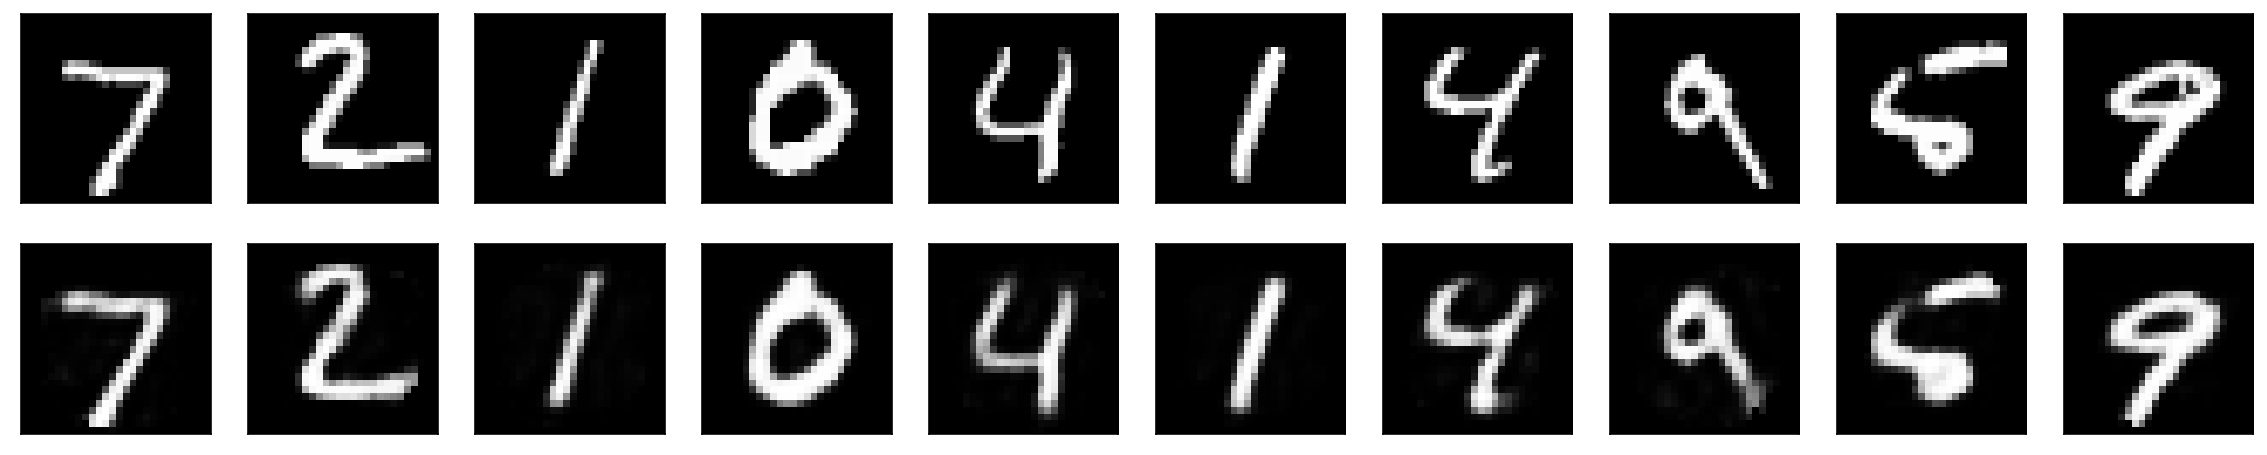

In [79]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()